In [15]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk --upgrade
!pip install wordcloud

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
with open('dataset.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [44]:
from pathlib import Path

file = Path('dataset.txt')
size_gb = file.stat().st_size / (1024 ** 3)
print(f"Размер файла: {size_gb:.3f} GB") 

Размер файла: 0.022 GB


In [ ]:
def count_words(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
        words = text.split()  # Разбиение по whitespace
        return len(words)

def count_sentences_simple(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
        sentences = [s.strip() for s in re.split(r'[.!?…]+', text) if s.strip()]
        return len(sentences)
    
def avg_sentence_length_basic(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()

        sentences = [s.strip() for s in re.split(r'[.!?…]+', text) if s.strip()]
        
        word_counts = [len(re.findall(r'\w+', s)) for s in sentences]
        
        return sum(word_counts) / len(word_counts) if word_counts else 0

In [26]:
print("=== Основные метрики текста ===")
print(f"Общее количество символов: {len(text)}")
print(f"Количество слов: {count_words('dataset.txt')}")
print(f"Количество предложений: {count_sentences_simple('dataset.txt')}")
print(f"Средняя длина предложения: {avg_sentence_length_basic('dataset.txt'):.1f} слов")

=== Основные метрики текста ===
Общее количество символов: 13060363
Количество слов: 2063953
Количество предложений: 167396
Средняя длина предложения: 12.0 слов


In [33]:
print("=== Основные метрики текста ===")
print(f"Общее количество символов: {len(text)}")
print(f"Общее количество слов: {len(word_tokenize(text))}")
print(f"Общее количество предложений: {len(sent_tokenize(text))}")
print(f"Средняя длина предложения (в словах): {round(len(word_tokenize(text)) / len(sent_tokenize(text)), 2)}")

=== Основные метрики текста ===
Общее количество символов: 13060363
Общее количество слов: 2550681
Общее количество предложений: 148873
Средняя длина предложения (в словах): 17.13


In [34]:
words = word_tokenize(text.lower())
words = [word for word in words if word.isalpha()]  # Убираем цифры и спецсимволы
stop_words = set(stopwords.words('russian'))  # Для английского: 'english'
filtered_words = [word for word in words if word not in stop_words]

word_freq = Counter(filtered_words).most_common(20)
print("\n=== Топ-20 самых частых слов (без стоп-слов) ===")
for word, freq in word_freq:
    print(f"{word}: {freq}")


=== Топ-20 самых частых слов (без стоп-слов) ===
это: 11905
сказал: 7759
сказала: 2726
очень: 2714
время: 2641
который: 2438
въ: 2318
человек: 2007
которые: 1974
дело: 1925
всё: 1865
говорил: 1786
глаза: 1769
своей: 1725
граф: 1669
князь: 1575
лицо: 1567
мог: 1564
руку: 1542
день: 1507


lemmatization?

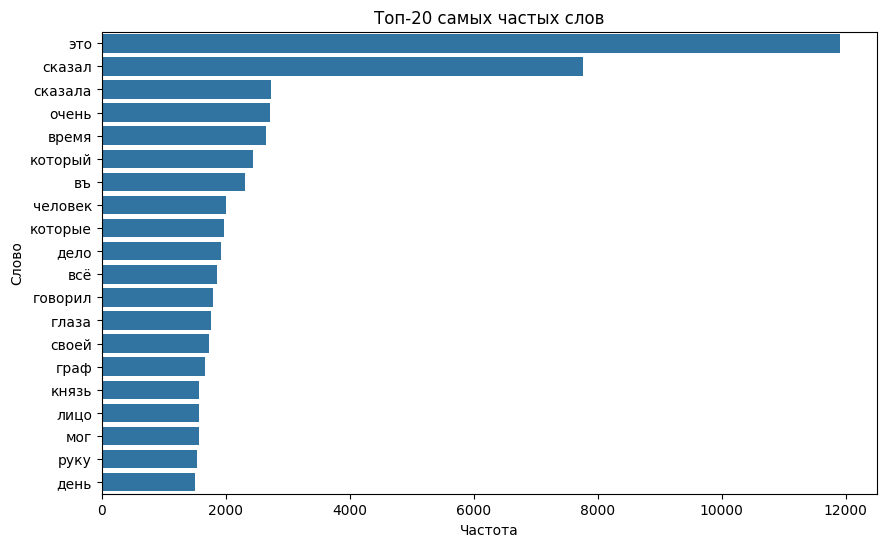

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=[freq for word, freq in word_freq], y=[word for word, freq in word_freq])
plt.title("Топ-20 самых частых слов")
plt.xlabel("Частота")
plt.ylabel("Слово")
plt.show()

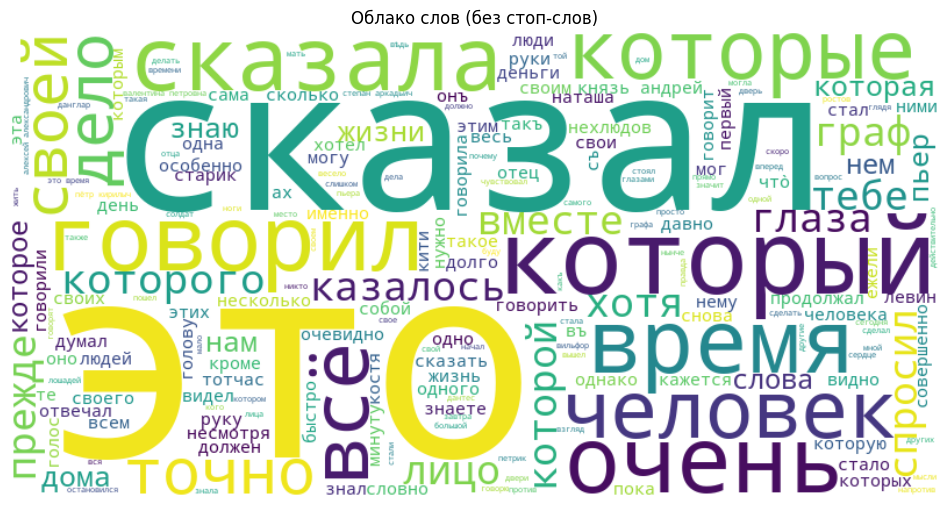

In [46]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Облако слов (без стоп-слов)")
plt.show()

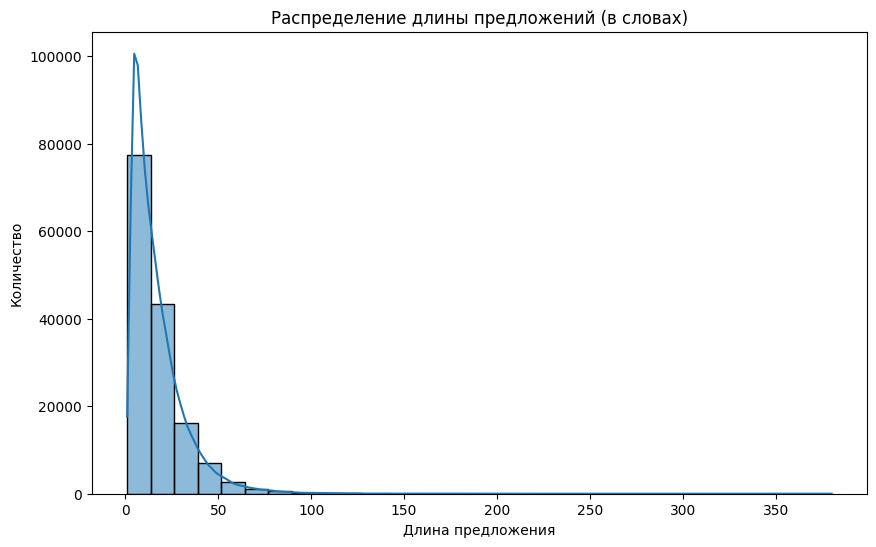

In [47]:
sentences = sent_tokenize(text)
sentence_lengths = [len(word_tokenize(sent)) for sent in sentences]

plt.figure(figsize=(10, 6))
sns.histplot(sentence_lengths, bins=30, kde=True)
plt.title("Распределение длины предложений (в словах)")
plt.xlabel("Длина предложения")
plt.ylabel("Количество")
plt.show()

In [48]:
unique_words = set(words)
print(f"\nКоличество уникальных слов: {len(unique_words)}")
print(f"Лексическое разнообразие (уникальные слова / общее количество слов): {round(len(unique_words) / len(words), 3)}")


Количество уникальных слов: 144482
Лексическое разнообразие (уникальные слова / общее количество слов): 0.074


лексическое разнообразие - плохо(не прям совсем)

In [49]:
rare_words = [word for word, count in Counter(words).items() if count <= 2]
print(f"\nКоличество редких слов (встречаются ≤ 2 раз): {len(rare_words)}")
print("Примеры редких слов:", rare_words[:10])


Количество редких слов (встречаются ≤ 2 раз): 93318
Примеры редких слов: ['электронной', 'олега', 'колесникова', 'вынянчившая', 'ветреная', 'сугробы', 'намело', 'замерзлы', 'тусклы', 'беспомощной']


In [50]:
html_tags = re.findall(r'<.*?>', text)
if html_tags:
    print(f"\nВнимание: найдены HTML-теги ({len(html_tags)} шт.)")
else:
    print("\nHTML-теги не обнаружены.")


HTML-теги не обнаружены.


нормализация архаизмов?(вероятно не нужна)

1. Общие характеристики
Размер данных: 0.022 GB (22 MB)

*Достаточно для знакомства с архитектурой GPT-2, но маловато для качественной генерации*

Объём текста:

1.3M символов / 2.55M слов / 148k предложений

*Типичный размер 1-2 полноценных романов*

2. Лингвистические особенности
Средняя длина предложения: 17.13 слов

*Выше среднего (норма 10-15 слов)*

Указывает на сложные синтаксические конструкции, характерные для классической литературы

Топ-20 частых слов:

Явное доминирование:

Речевых маркеров ("сказал", "говорил" - суммарно 10.5k)

Указательных местоимений ("это", "всё")

Историческая лексика:

"граф" (1669), "князь" (1575), "въ" (архаичная форма)

Антропоцентричность:

"человек", "глаза", "лицо", "руку"

Лексическое разнообразие:

144k уникальных слов (7.4% от общего количества)

*Низкий показатель (оптимально 10-20%)*

Причина: высокая повторяемость речевых конструкций


3. Проблемные места
Редкие слова:

93k слов встречаются ≤2 раз (64% уникальной лексики!)

Примеры: "вынянчившая", "замерзлы", "намело"

Риск для генерации: модель может некорректно использовать редкие слова

Архаизмы:

"въ" вместо "в" (2318 раз)

Требуется нормализация

4. Качество данных
Отсутствие HTML-тегов:

Хороший признак чистоты данных

Распределение частот:

Резкий перепад между топом и хвостом:

"это": 11.9k vs "день": 1.5k (в топ-20)

93k слов на грани исчезающе редких